# **CNN assignment**(Do read the note at the end)

Description: Here we are going to use CNN to classify images of elephants,tigers,cheetah's and crocodiles. Basically multiclass classificiation using CNN.

**Q.1** Import all required modules

In [32]:
#Your code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Conv2D,GlobalAveragePooling2D,Flatten,Dense,Input,Dropout,BatchNormalization,Activation,MaxPooling2D
from tensorflow.keras.models import Model
import cv2 as cv
import os
from sklearn.model_selection import train_test_split

**Q.2** Load data using image_dataset_from_directory(https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory)

In [33]:
Animals = []
Labels = []

# Function to load, resize, and normalize images
def load_resize_and_normalize_images(folder_path, label, target_size=(224, 224)):
    images = []
    file_list = os.listdir(folder_path)
    for file_name in file_list:
        file_path = os.path.join(folder_path, file_name)
        img = cv.imread(file_path)
        if img is not None:
            # Resize the image to a target size
            img = cv.resize(img, target_size)
            # Normalize the image
            img = cv.normalize(img, None, alpha=0, beta=1, norm_type=cv.NORM_MINMAX, dtype=cv.CV_32F)
            images.append(img)
    return images, np.full(len(images), label)

# Paths to the image folders
folder_paths = {
    'cheetah': '/kaggle/input/ls-ml-animals/LS_Animals/Cheetah',
    'crocodile': '/kaggle/input/ls-ml-animals/LS_Animals/Crocodile',
    'elephant': '/kaggle/input/ls-ml-animals/LS_Animals/Elephants',
    'tiger': '/kaggle/input/ls-ml-animals/LS_Animals/Tiger'
}

# Load, resize, and normalize images for each animal
cheetah, l_ch = load_resize_and_normalize_images(folder_paths['cheetah'], 0)
crocodile, l_cr = load_resize_and_normalize_images(folder_paths['crocodile'], 1)
elephant, l_el = load_resize_and_normalize_images(folder_paths['elephant'], 2)
tiger, l_ti = load_resize_and_normalize_images(folder_paths['tiger'], 3)

# Concatenate the image lists
Animals = cheetah + crocodile + elephant + tiger

# Concatenate the labels
Labels = np.concatenate((l_ch, l_cr, l_el, l_ti))

# Convert Animals to a numpy array (optional, depending on further processing)
Animals = np.array(Animals)

print("Number of images:", len(Animals))
print("Labels:", Labels)

Number of images: 1658
Labels: [0 0 0 ... 3 3 3]


In [34]:
a = np.array(Animals[10])
print(a.shape)


(224, 224, 3)


**Q.3** Map the data such that all pixel values lie between 0 and 1 using the **lambda function**

In [35]:
#data=data.map(#Your code here)

**Q.4** Split the data into train set and test set(and validation set if needed) using **data.take**(https://www.geeksforgeeks.org/tensorflow-js-tf-data-dataset-class-take-method/) and **data.skip**(https://www.geeksforgeeks.org/tensorflow-js-tf-data-dataset-skip-method/)

In [36]:
#Your code here
X_train, X_test, y_train, y_test = train_test_split(Animals, Labels, test_size=0.1, random_state=1000)

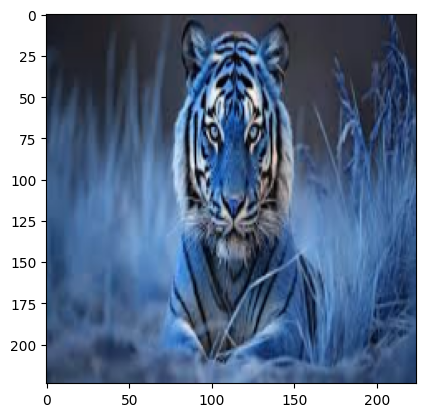

In [37]:
plt.imshow(X_train[0])
plt.show()

**Creating the model**

**Q.5** Write code to create CNN model including fully connected layers with softmax as final layer.

In [114]:
input_shape = (224, 224, 3)
inputs = Input(shape=input_shape)

# First convolutional block
x = Conv2D(32, (3, 3), padding='same')(inputs)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

# Second convolutional block
x = Conv2D(64, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

# Third convolutional block
x = Conv2D(128, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

# Fourth convolutional block
x = Conv2D(256, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

# Flatten the output
x = Flatten()(x)
# Fully connected layers
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
outputs = Dense(4, activation='softmax')(x)
model = Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_17 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_69 (Conv2D)              │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_69          │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_69 (Activation)      │ (None, 224, 224, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_68 (MaxPooling2D) │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_70 (Conv2D)              │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_70          │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_70 (Activation)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_69 (MaxPooling2D) │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_71 (Conv2D)              │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_71          │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_71 (Activation)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_70 (MaxPooling2D) │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_72 (Conv2D)              │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_72          │ (None, 28, 28, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_72 (Activation)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_71 (MaxPooling2D) │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_17 (Flatten)            │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 512)            │    25,690,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,147,140 (99.74 MB)

 Trainable params: 26,146,180 (99.74 MB)

 Non-trainable params: 960 (3.75 KB)

**Q.6** Compile your model

In [115]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



**Q.7** Fit your model with train set and make sure to keep **less epochs**(10-15) as the dataset size is very large.

In [116]:
model.fit(X_train, y_train,epochs=30,batch_size=16,validation_split=0.1)

Epoch 1/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 19s 114ms/step - accuracy: 0.3451 - loss: 18.9044 - val_accuracy: 0.3333 - val_loss: 2.7189
Epoch 2/30
 6/84 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.3635 - loss: 3.4159

W0000 00:00:1721151038.992609    6942 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.4242 - loss: 2.3525 - val_accuracy: 0.1400 - val_loss: 1.4736
Epoch 3/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.4836 - loss: 1.2591 - val_accuracy: 0.4600 - val_loss: 1.3662
Epoch 4/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.5161 - loss: 1.1443 - val_accuracy: 0.4667 - val_loss: 1.2947
Epoch 5/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.5420 - loss: 1.0935 - val_accuracy: 0.4333 - val_loss: 1.2582
Epoch 6/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.5833 - loss: 1.0200 - val_accuracy: 0.5733 - val_loss: 1.0352
Epoch 7/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.6368 - loss: 0.9177 - val_accuracy: 0.5600 - val_loss: 1.1922
Epoch 8/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.6297 - loss: 0.8832 - val_accuracy: 0.4800 - val_loss: 1.3756
Epoch 9/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.6846 - loss: 0.8158 - val_accuracy: 0.4533 - val_loss: 1.

**Q.8** Test your code with test set

In [117]:
loss,accuracy=model.evaluate(X_test,y_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8482 - loss: 0.5473


In [118]:
# Do not change this code
if accuracy>=0.85:
  print("Congratulations, CNN assignment complete!!")
else:
  print("Try again, not enough accuracy")

Try again, not enough accuracy




**Note: 1. Many of you will get very high train accuracy but low test accuracy. This is called overfitting, this can be solved by increase the train set size. If your getting low accuracy for both train and test, modify your layers in the model.**

**2.Do use T4GPU.Ideally your first epoch will take quite sometime and rest of the epochs will be faster but if all your epochs are taking a lot of time, try starting a new gpu session(open a new gmail account and open colab on that) because your free gpu might have exhausted itself.**

**3.Other than its a easy task, happy learning!!**